# Analisis del experimento manual

## Caracteristicas del experimento realizado manualmente ##
 
A continuación se resumen las caracteristicas manejadas en el experimento:
1. Tasas de transferencia manejadas: Normal, 2kpps, 4kpps, 6kpps, 8kpps, 10kpps y flood.
2. Una replica por caso.
3. Por el momento la medición para el presente análisis esta con iperf.

In [9]:
# importando las librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os

## Medicion iperf asociada a cada tasa ##

A continuación se muestra el resultado del **iperf** para cada medición completa.

In [3]:
baseDir = './csv_files/'
archivo = 'resumen.csv'
dfSummary = pd.read_csv(baseDir + archivo,sep=';', index_col=1)
dfSummary.columns.name = 'Metricas'
dfSummary.index.name = 'Tasa'
print(dfSummary)

Metricas  Unnamed: 0   interval  transfer    BW
Tasa                                           
8kpps              0  0.0-200.2      2.18  93.4
2kpps              1  0.0-200.4      2.22  95.3
flooding           2  0.0-200.0      1.08  46.2
10kpps             3  0.0-200.2      2.16  92.5
normal             4  0.0-200.0      2.23  95.7
4kpps              5  0.0-200.2      2.21  94.7
6kpps              6  0.0-200.0      2.19  94.0


### Grafica comparativa de anchos de banda ###

<IPython.core.display.Javascript object>


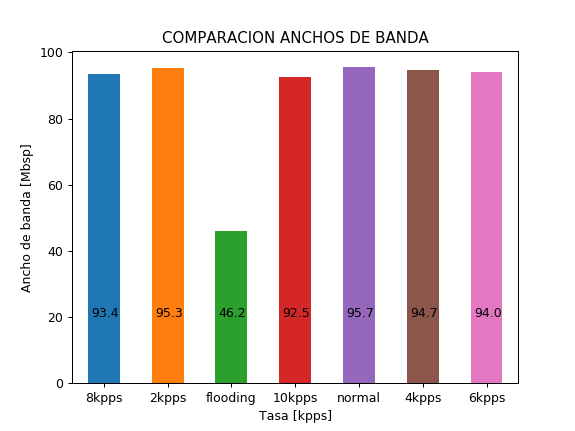

In [8]:
%matplotlib notebook
axes = dfSummary['BW'].plot.bar(rot=0)
axes.set_title('COMPARACION ANCHOS DE BANDA')
axes.set_ylabel('Ancho de banda [Mbsp]')
axes.set_xlabel('Tasa [kpps]')
pos_x = 0
j = 0

for i in axes.patches:
    # print(i.get_width(),i.get_y())    
    axes.text(pos_x - i.get_width()/2 + 0.05,20,str(dfSummary['BW'][j]))
    pos_x += 1
    j += 1    



## Grafico de la variación del ancho de banda con respecto al tiempo ##

             8kpps  2kpps  flooding  10kpps  normal  4kpps  6kpps
interval                                                         
0.0-1.0      109.0  102.0      43.0   109.0   102.0  106.0  105.0
1.0-2.0      101.0   99.6      38.8   105.0    95.4   98.6  104.0
2.0-3.0      105.0   98.6      36.7   118.0    94.4  102.0  105.0
3.0-4.0      106.0   96.5      35.7    96.5    95.4  106.0   98.6
4.0-5.0      114.0  103.0      51.4    93.3    96.5   91.2  107.0
5.0-6.0       80.7   93.3      40.9    95.4    95.4  110.0  109.0
6.0-7.0      110.0   97.5      39.8    93.3    96.5   91.2  102.0
7.0-8.0       83.9   97.5      37.7    94.4    95.4  104.0   87.0
8.0-9.0      110.0  109.0      37.7    92.3    96.5   94.4   97.5
9.0-10.0      82.8   90.2      34.6    91.2    95.4  103.0  104.0
10.0-11.0     82.8   97.5      46.1    92.3    94.4  114.0  103.0
11.0-12.0    110.0  108.0      36.7    91.2    95.4   94.4  104.0
12.0-13.0     82.8   98.6      40.9    92.3    96.5  102.0   68.2
13.0-14.0 

<IPython.core.display.Javascript object>


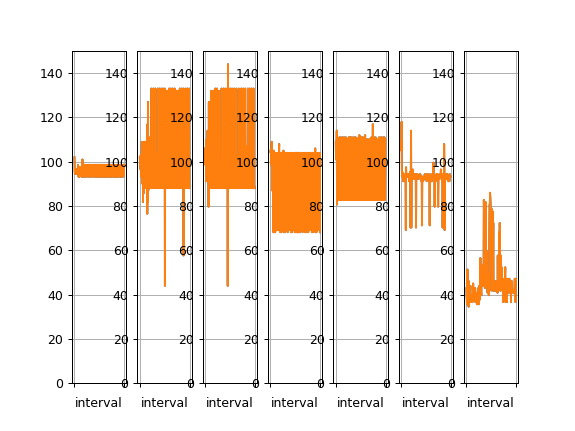

In [5]:
# print(dfSummary.index.values)
baseDir = './csv_files/'
iperf_BW = {}
files = os.listdir(baseDir)
for f in files:
    for k in dfSummary.index.values:
        if k in f:
            iperf_BW[k] = pd.read_csv(baseDir + f ,sep=';',index_col=0)

# Ancho de banda respecto al tiempo
df_bw = pd.DataFrame(columns=dfSummary.index.values)
for k in iperf_BW:
    df_bw[k] = iperf_BW[k]['BW']
print(df_bw)

# Grafica
%matplotlib notebook
axes = df_bw.plot(ylim = [0,150],grid = True)
l = axes.legend(loc='best')


<IPython.core.display.Javascript object>


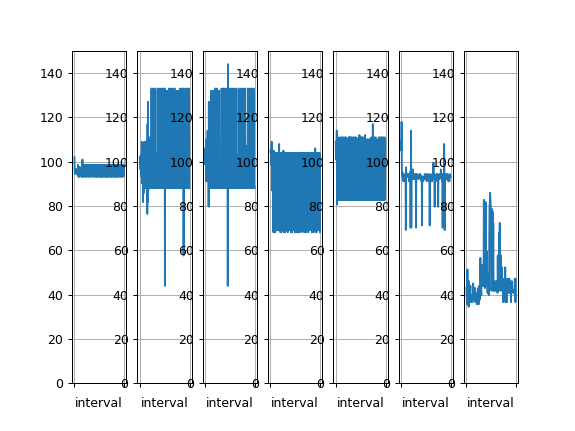

In [10]:
#%matplotlib notebook
#axes = df_bw.plot(ylim = [0,150],grid = True)
#l = axes.legend(loc='best')
plt.figure(1)
plt.subplot(1,7,1)
#axes = df_bw['normal'].plot(ylim = [0,150],grid = True, subplots=True, layout=(6,1))
df_bw['normal'].plot(ylim = [0,150],grid = True)
plt.subplot(1,7,2)
df_bw['2kpps'].plot(ylim = [0,150],grid = True )
plt.subplot(1,7,3)
df_bw['4kpps'].plot(ylim = [0,150],grid = True )
plt.subplot(1,7,4)
df_bw['6kpps'].plot(ylim = [0,150],grid = True )
plt.subplot(1,7,5)
df_bw['8kpps'].plot(ylim = [0,150],grid = True )
plt.subplot(1,7,6)
df_bw['10kpps'].plot(ylim = [0,150],grid = True )
plt.subplot(1,7,7)
df_bw['flooding'].plot(ylim = [0,150],grid = True )
